# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)]
(https://www.kaggle.com/code/itzelbailon/project-part1-languagedetection/)

## a) Introductory proposal

   I will use a Natural Language Processing model for language detection/prediction using a Kaggle data base (https://www.kaggle.com/datasets/basilb2s/language-detection). This database contains 2 columns, one for text details(sample text) with 10267 unique values, and one for Language with 17 different languages:
   1. English
   2. Malayalam
   3. Hindi
   4. Tamil
   5. Kannada
   6. French
   7. Spanish
   8. Portuguese
   9. Italian
   10. Russian
   11. Sweedish
   12. Dutch
   13. Arabic
   14. Turkish
   15. German
   16. Danish
   17. Greek
   
   
   Predicting a language is a multiclass classification problem, as the model will divide the observations into 17 categories. Support Vector Machines model will be used to predict the language.



## b) Exploratory Data Analysis

In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
import re
from scipy.stats import norm
from matplotlib import pyplot
# import the dataset
df = pd.read_csv("../input/language-detection/Language Detection.csv")
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [2]:
#How many rows of data there is in this dataset
len(df)


10337

Knowing how many rows of data are in this dataset will give us an idea of how many repeated samples of text is in this dataset.

### Preprocessing

It's important to clean the data and take some preventive steps before doing the analysis.

First, let's convert the 'Text' column to string format in case there is some data not in string format.

In [3]:
df['Text']= df['Text'].astype(str)

Then, let's delete any row that might have missing text.

In [4]:
df=df[~df['Text'].isnull()]
len(df)


10337

Row number remained unchanged, no null values.

Now let's remove special characters and punctuation that are not helpful for analysis. Also let's convert all text to lower case to avoid same words to be consider as different because of an uppercase.

In [5]:
#Delete the Special Characters


#def clean(txt):
    #txt = txt.str.replace("()", "")
    #txt = txt.str.replace('(<a).*(>).*()', '')
    #txt = txt.str.replace('(&amp)', '')
    #txt = txt.str.replace('(&gt)', '')
    #txt = txt.str.replace('(&lt)', '')
    #txt = txt.str.replace('(\xa0)', ' ') 
    
    #return txtdf['Text'] = clean(df['Text'])
    
df['Text1'] = df['Text'].str.replace('\W', '')
    


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [6]:
#Convert to lower case
df['Text1'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text1'].head()

0    nature, in the broadest sense, is the natural,...
1    "nature" can refer to the phenomena of the phy...
2    the study of nature is a large, if not the onl...
3    although humans are part of nature, human acti...
4    [1] the word nature is borrowed from the old f...
Name: Text1, dtype: object

In [7]:
#Delete the Punctuation

df['Text1'] = df['Text1'].str.replace('[^\w\s]', '')
df['Text1'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


0    nature in the broadest sense is the natural ph...
1    nature can refer to the phenomena of the physi...
2    the study of nature is a large if not the only...
3    although humans are part of nature human activ...
4    1 the word nature is borrowed from the old fre...
Name: Text1, dtype: object

### Data Analysis

To start the analysis, I will add the length of the sample text and the word count of each text sample.

array([[<AxesSubplot:title={'center':'text_len'}>,
        <AxesSubplot:title={'center':'word_count'}>]], dtype=object)

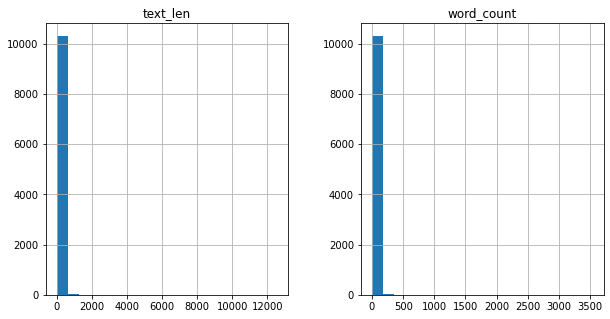

In [8]:
df['text_len'] = df['Text1'].astype(str).apply(len)
df['word_count'] = df['Text1'].apply(lambda x: len(str(x).split()))

#Distributions
df[["text_len", "word_count"]].hist(bins=20, figsize=(10, 5))